In [1]:
!pip install --upgrade scikit-learn scikeras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 95.9 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sklearn-compat 0.1.3 requires scikit-learn<1.7,>=1.2, but you have scikit-learn 1.7.0 which is incompatible.


In [2]:
!pip install imblearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 67.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.7.0
    Uninstalling scikit-learn-1.7.0:
      Successfully uninstalled scikit-learn-1.7.0


In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

In [34]:
df = pd.read_csv("HI-Small_Trans.csv")

In [5]:
df.head(10)

,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering
0,2022/09/01 00:20,10,8000EBD30,10,8000EBD30,3697.34,US Dollar,3697.34,US Dollar,Reinvestment,0
1,2022/09/01 00:20,3208,8000F4580,1,8000F5340,0.01,US Dollar,0.01,US Dollar,Cheque,0
2,2022/09/01 00:00,3209,8000F4670,3209,8000F4670,14675.57,US Dollar,14675.57,US Dollar,Reinvestment,0
3,2022/09/01 00:02,12,8000F5030,12,8000F5030,2806.97,US Dollar,2806.97,US Dollar,Reinvestment,0
4,2022/09/01 00:06,10,8000F5200,10,8000F5200,36682.97,US Dollar,36682.97,US Dollar,Reinvestment,0
5,2022/09/01 00:03,1,8000F5AD0,1,8000F5AD0,6162.44,US Dollar,6162.44,US Dollar,Reinvestment,0
6,2022/09/01 00:08,1,8000EBAC0,1,8000EBAC0,14.26,US Dollar,14.26,US Dollar,Reinvestment,0
7,2022/09/01 00:16,1,8000EC1E0,1,8000EC1E0,11.86,US Dollar,11.86,US Dollar,Reinvestment,0
8,2022/09/01 00:26,12,8000EC280,2439,8017BF800,7.66,US Dollar,7.66,US Dollar,Credit Card,0
9,2022/09/01 00:21,1,8000EDEC0,211050,80AEF5310,383.71,US Dollar,383.71,US Dollar,Credit Card,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5078345 entries, 0 to 5078344
Data columns (total 11 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Timestamp           object 
 1   From Bank           int64  
 2   Account             object 
 3   To Bank             int64  
 4   Account.1           object 
 5   Amount Received     float64
 6   Receiving Currency  object 
 7   Amount Paid         float64
 8   Payment Currency    object 
 9   Payment Format      object 
 10  Is Laundering       int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 426.2+ MB


In [7]:
object_cols = df.select_dtypes('object').columns.drop('Timestamp')
df[object_cols] = df[object_cols].astype('string')

In [8]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5078345 entries, 0 to 5078344
Data columns (total 11 columns):
 #   Column              Dtype         
---  ------              -----         
 0   Timestamp           datetime64[ns]
 1   From Bank           int64         
 2   Account             string        
 3   To Bank             int64         
 4   Account.1           string        
 5   Amount Received     float64       
 6   Receiving Currency  string        
 7   Amount Paid         float64       
 8   Payment Currency    string        
 9   Payment Format      string        
 10  Is Laundering       int64         
dtypes: datetime64[ns](1), float64(2), int64(3), string(5)
memory usage: 426.2 MB


In [10]:
df.duplicated().sum()

np.int64(9)

In [11]:
df.drop_duplicates()

,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering
0,2022-09-01 00:20:00,10,8000EBD30,10,8000EBD30,3697.340000,US Dollar,3697.340000,US Dollar,Reinvestment,0
1,2022-09-01 00:20:00,3208,8000F4580,1,8000F5340,0.010000,US Dollar,0.010000,US Dollar,Cheque,0
2,2022-09-01 00:00:00,3209,8000F4670,3209,8000F4670,14675.570000,US Dollar,14675.570000,US Dollar,Reinvestment,0
3,2022-09-01 00:02:00,12,8000F5030,12,8000F5030,2806.970000,US Dollar,2806.970000,US Dollar,Reinvestment,0
4,2022-09-01 00:06:00,10,8000F5200,10,8000F5200,36682.970000,US Dollar,36682.970000,US Dollar,Reinvestment,0
...,...,...,...,...,...,...,...,...,...,...,...
5078340,2022-09-10 23:57:00,54219,8148A6631,256398,8148A8711,0.154978,Bitcoin,0.154978,Bitcoin,Bitcoin,0
5078341,2022-09-10 23:35:00,15,8148A8671,256398,8148A8711,0.108128,Bitcoin,0.108128,Bitcoin,Bitcoin,0
5078342,2022-09-10 23:52:00,154365,8148A6771,256398,8148A8711,0.004988,Bitcoin,0.004988,Bitcoin,Bitcoin,0
5078343,2022-09-10 23:46:00,256398,8148A6311,256398,8148A8711,0.038417,Bitcoin,0.038417,Bitcoin,Bitcoin,0


In [12]:
df.isna().sum()

,0
Timestamp,0
From Bank,0
Account,0
To Bank,0
Account.1,0
Amount Received,0
Receiving Currency,0
Amount Paid,0
Payment Currency,0
Payment Format,0


In [13]:
df.describe()

,Timestamp,From Bank,To Bank,Amount Received,Amount Paid,Is Laundering
count,5078345,5.078345e+06,5.078345e+06,5.078345e+06,5.078345e+06,5.078345e+06
mean,2022-09-05 07:16:08.194274816,4.573057e+04,6.574456e+04,5.988726e+06,4.509273e+06,1.019427e-03
min,2022-09-01 00:00:00,1.000000e+00,1.000000e+00,1.000000e-06,1.000000e-06,0.000000e+00
25%,2022-09-02 04:32:00,1.190000e+02,4.259000e+03,1.833700e+02,1.844800e+02,0.000000e+00
50%,2022-09-05 12:16:00,9.679000e+03,2.156800e+04,1.411010e+03,1.414540e+03,0.000000e+00
75%,2022-09-08 03:13:00,2.862800e+04,1.223320e+05,1.234627e+04,1.229784e+04,0.000000e+00
max,2022-09-18 16:18:00,3.563030e+05,3.562940e+05,1.046302e+12,1.046302e+12,1.000000e+00
std,NaN,8.176562e+04,8.409299e+04,1.037183e+09,8.697728e+08,3.191219e-02


In [13]:
df['Payment Format'].value_counts()

,count
Payment Format,
Cheque,1864331
Credit Card,1323324
ACH,600797
Cash,490891
Reinvestment,481056
Wire,171855
Bitcoin,146091


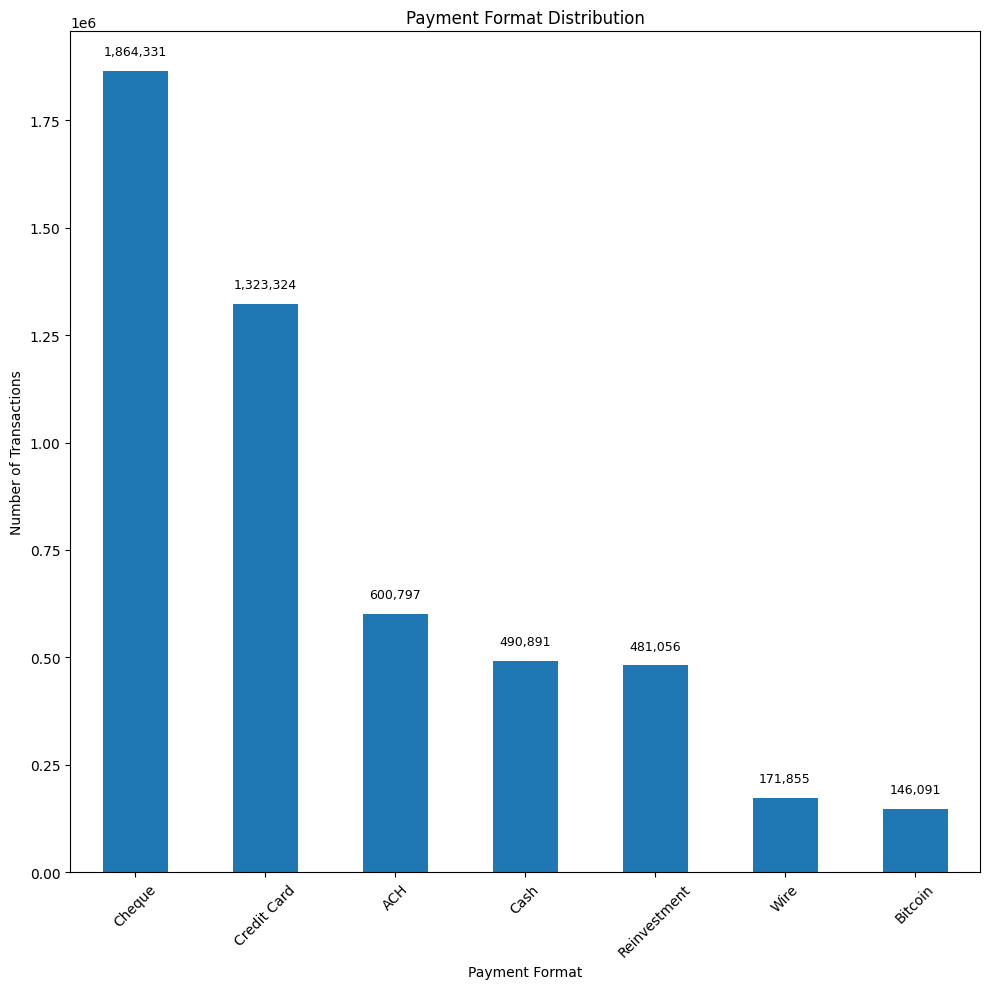

In [14]:
counts = df['Payment Format'].value_counts()
plt.figure(figsize=(10,10))
ax = counts.plot(kind='bar')
plt.ylabel('Number of Transactions')
plt.title('Payment Format Distribution')

for i, v in enumerate(counts):
    ax.text(i, v + 30000, f'{v:,}', ha='center', va='bottom', fontsize=9, rotation=0)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


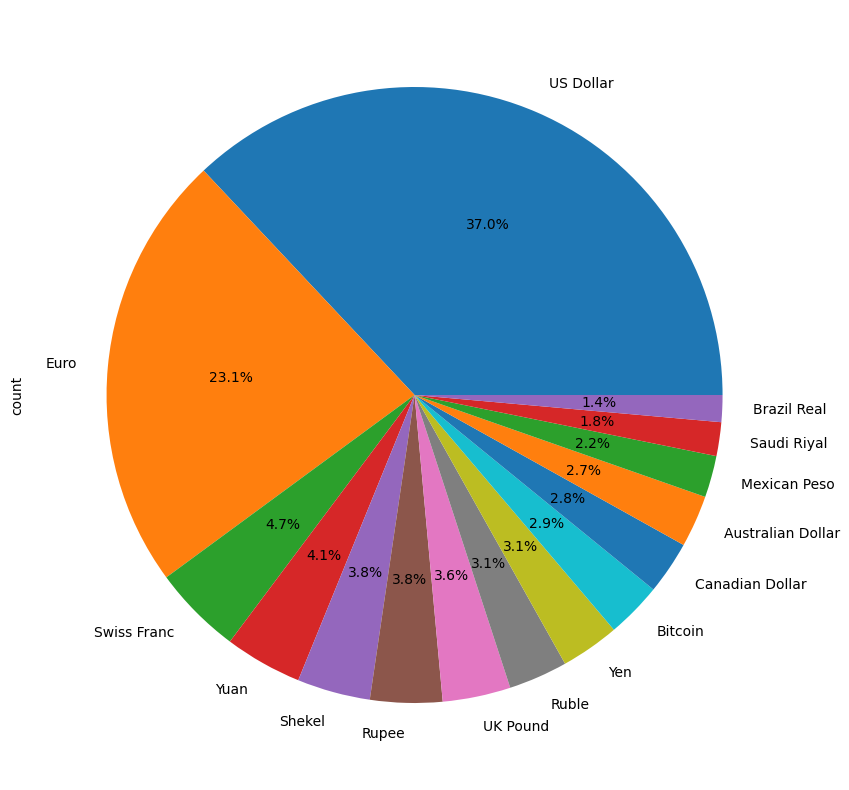

In [15]:
plt.figure(figsize=(10,10))
df['Receiving Currency'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

In [16]:
df['Is Laundering'].value_counts()

,count
Is Laundering,
0,5073168
1,5177


<Axes: xlabel='Is Laundering'>

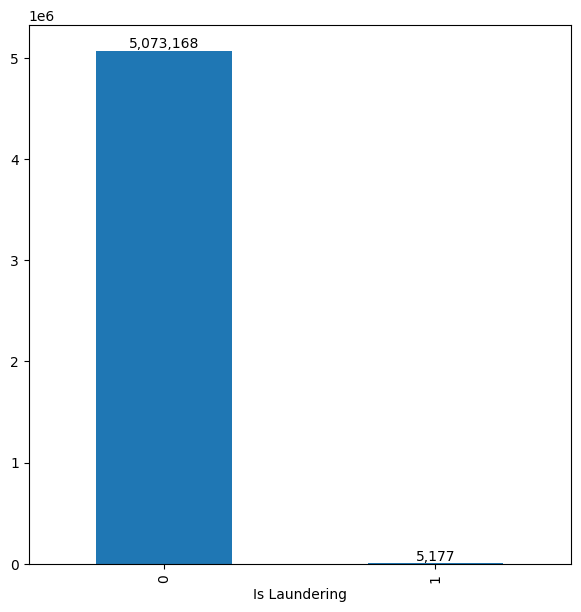

In [17]:
plt.figure(figsize=(7,7))
counts = df['Is Laundering'].value_counts()
ax = counts.plot(kind='bar')
for i,v in enumerate(df['Is Laundering'].value_counts()):
    ax.text(i, v, f'{v:,}',ha='center', va='bottom')
df['Is Laundering'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'Laundering Rate by Payment Format')

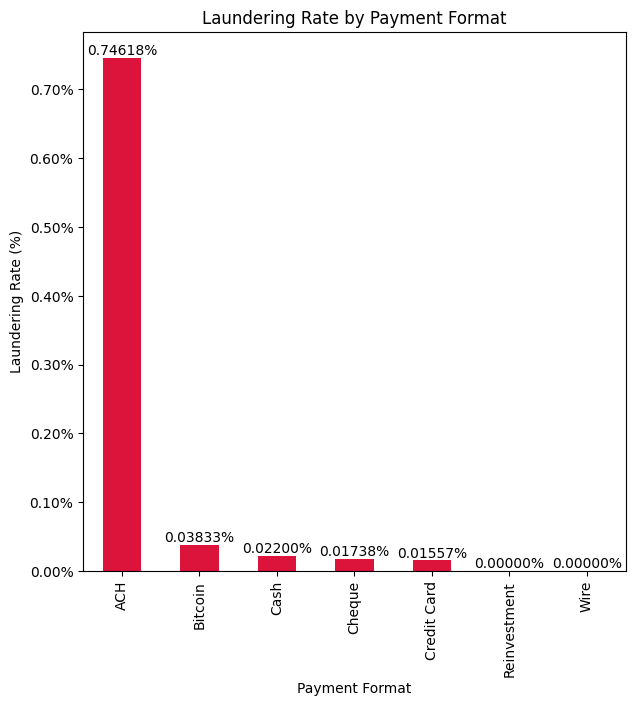

In [18]:
plt.figure(figsize=(7,7))
laundering_by_format = df.groupby('Payment Format')['Is Laundering'].mean().sort_values(ascending=False)
ax = laundering_by_format.plot(kind='bar')
for i,v in enumerate(laundering_by_format):
    ax.text(i,v,f'{v:.5%}',va = 'bottom',ha = 'center')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
laundering_by_format.plot(kind='bar', color='crimson')
plt.ylabel('Laundering Rate (%)')
plt.title('Laundering Rate by Payment Format')

In [19]:
numeric_data = df.select_dtypes('number')

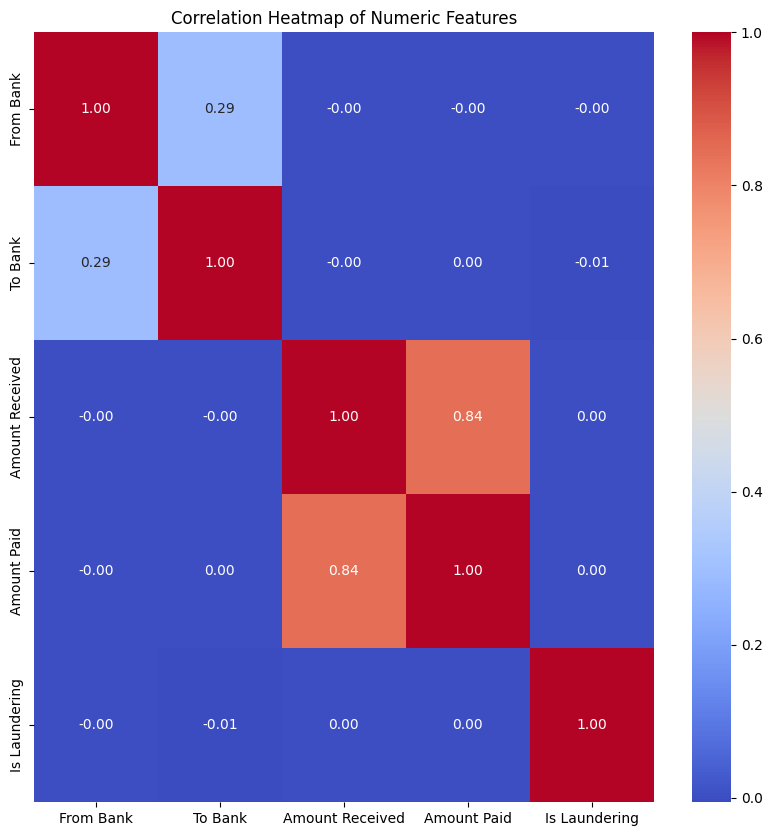

In [20]:
plt.figure(figsize=(10,10))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
categorical_columns = df.select_dtypes(include=['string']).columns
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])
df.head()

,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering
0,2022-09-01 00:20:00,10,942,10,900,3697.34,12,3697.34,12,5,0
1,2022-09-01 00:20:00,3208,990,1,949,0.01,12,0.01,12,3,0
2,2022-09-01 00:00:00,3209,991,3209,940,14675.57,12,14675.57,12,5,0
3,2022-09-01 00:02:00,12,997,12,945,2806.97,12,2806.97,12,5,0
4,2022-09-01 00:06:00,10,999,10,947,36682.97,12,36682.97,12,5,0


In [22]:
# from sklearn.feature_selection import mutual_info_classif

# X = df.drop(['Is Laundering','Timestamp'], axis=1)
# y = df['Is Laundering']

# mi_scores = mutual_info_classif(X, y, discrete_features='auto')

In [23]:
# mi_df = pd.DataFrame({
#     'Feature': X.columns,
#     'MI Score': mi_scores
# }).sort_values(by='MI Score', ascending=False)

# print(mi_df)

In [24]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# plt.figure(figsize=(15, 10))

# ax = sns.barplot(x='MI Score', y='Feature', data=mi_df)

# for i, v in enumerate(mi_df['MI Score']):
#     ax.text(v, i, f'{v:.5f}', va='center', ha='left', fontsize=9, rotation='horizontal')

# plt.title('Mutual Information Score by Feature')
# plt.tight_layout()
# plt.show()


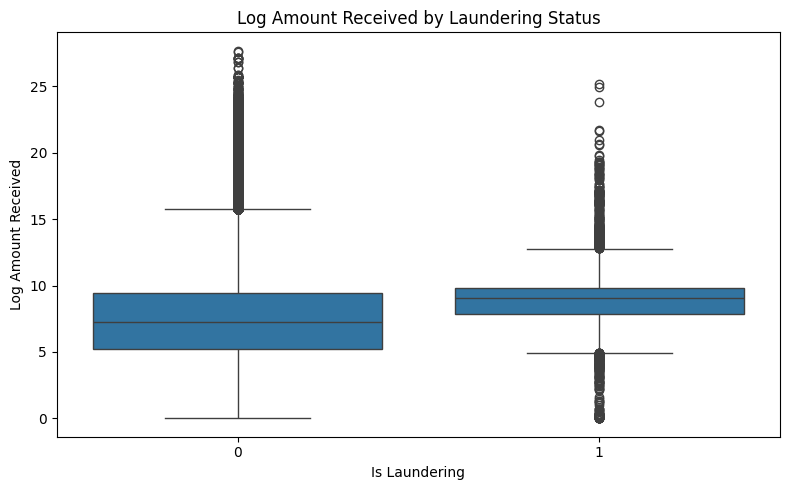

In [25]:
df['Log Amount Received'] = np.log1p(df['Amount Received'])

plt.figure(figsize=(8, 5))
sns.boxplot(x='Is Laundering', y='Log Amount Received', data=df)
plt.title('Log Amount Received by Laundering Status')
plt.tight_layout()
plt.show()


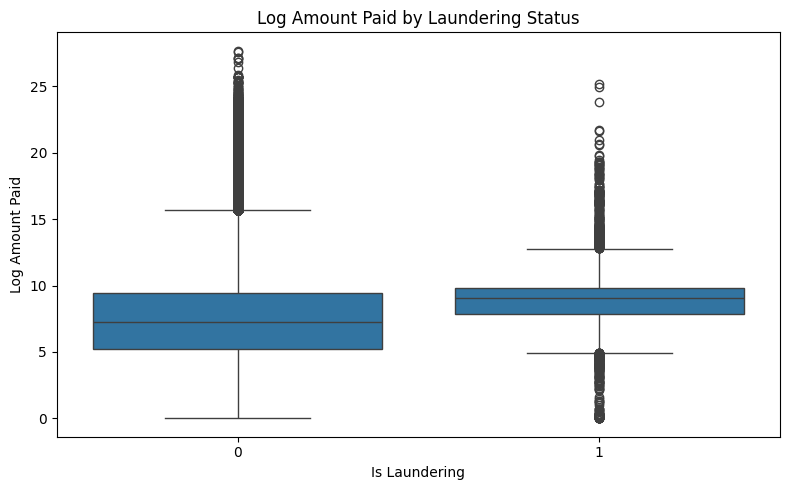

In [26]:
df['Log Amount Paid'] = np.log1p(df['Amount Paid'])

plt.figure(figsize=(8, 5))
sns.boxplot(x='Is Laundering', y='Log Amount Paid', data=df)
plt.title('Log Amount Paid by Laundering Status')
plt.tight_layout()
plt.show()


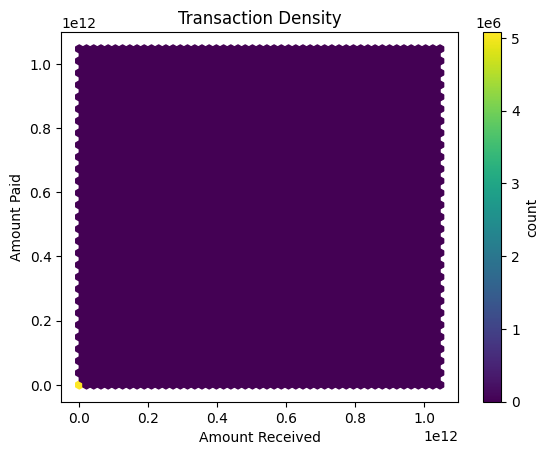

In [27]:
plt.hexbin(df["Amount Received"], df["Amount Paid"], gridsize=50)
plt.xlabel("Amount Received")
plt.ylabel("Amount Paid")
plt.title("Transaction Density")
plt.colorbar(label="count")
plt.show()


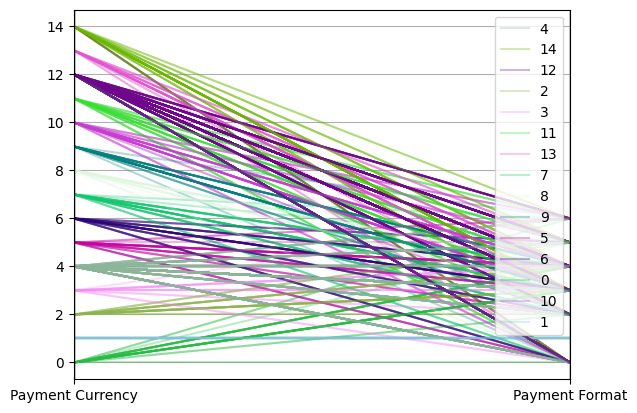

In [28]:
from pandas.plotting import parallel_coordinates
sample = df.sample(1000)
parallel_coordinates(
    sample[["Receiving Currency","Payment Currency","Payment Format"]],
    class_column="Receiving Currency",
    alpha=0.3
)
plt.show()


In [15]:
df

,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering
0,2022-09-01 00:20:00,10,942,10,900,3697.340000,12,3697.340000,12,5,0
1,2022-09-01 00:20:00,3208,990,1,949,0.010000,12,0.010000,12,3,0
2,2022-09-01 00:00:00,3209,991,3209,940,14675.570000,12,14675.570000,12,5,0
3,2022-09-01 00:02:00,12,997,12,945,2806.970000,12,2806.970000,12,5,0
4,2022-09-01 00:06:00,10,999,10,947,36682.970000,12,36682.970000,12,5,0
...,...,...,...,...,...,...,...,...,...,...,...
5078340,2022-09-10 23:57:00,54219,495979,256398,419726,0.154978,1,0.154978,1,1,0
5078341,2022-09-10 23:35:00,15,495988,256398,419726,0.108128,1,0.108128,1,1,0
5078342,2022-09-10 23:52:00,154365,495980,256398,419726,0.004988,1,0.004988,1,1,0
5078343,2022-09-10 23:46:00,256398,495978,256398,419726,0.038417,1,0.038417,1,1,0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5078345 entries, 0 to 5078344
Data columns (total 11 columns):
 #   Column              Dtype         
---  ------              -----         
 0   Timestamp           datetime64[ns]
 1   From Bank           int64         
 2   Account             int64         
 3   To Bank             int64         
 4   Account.1           int64         
 5   Amount Received     float64       
 6   Receiving Currency  int64         
 7   Amount Paid         float64       
 8   Payment Currency    int64         
 9   Payment Format      int64         
 10  Is Laundering       int64         
dtypes: datetime64[ns](1), float64(2), int64(8)
memory usage: 426.2 MB


In [17]:
df

,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering
0,2022-09-01 00:20:00,10,942,10,900,3697.340000,12,3697.340000,12,5,0
1,2022-09-01 00:20:00,3208,990,1,949,0.010000,12,0.010000,12,3,0
2,2022-09-01 00:00:00,3209,991,3209,940,14675.570000,12,14675.570000,12,5,0
3,2022-09-01 00:02:00,12,997,12,945,2806.970000,12,2806.970000,12,5,0
4,2022-09-01 00:06:00,10,999,10,947,36682.970000,12,36682.970000,12,5,0
...,...,...,...,...,...,...,...,...,...,...,...
5078340,2022-09-10 23:57:00,54219,495979,256398,419726,0.154978,1,0.154978,1,1,0
5078341,2022-09-10 23:35:00,15,495988,256398,419726,0.108128,1,0.108128,1,1,0
5078342,2022-09-10 23:52:00,154365,495980,256398,419726,0.004988,1,0.004988,1,1,0
5078343,2022-09-10 23:46:00,256398,495978,256398,419726,0.038417,1,0.038417,1,1,0


In [35]:
X = df.drop(['Is Laundering','Timestamp'],axis=1)
y = df['Is Laundering']

In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report,
    roc_auc_score,
    average_precision_score,
    precision_recall_curve,
    auc,
    precision_score,
    f1_score,
    recall_score
)
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt

In [36]:
import _ctypes

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    stratify=y,
    test_size=0.2,
    random_state=42
)

In [21]:
print(X_train.shape)

(4062676, 9)


In [22]:
print(X_test.shape)

(1015669, 9)


In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_test, y_test,
    stratify=y_test,
    test_size=0.2,
    random_state=42
)

In [25]:
print(X_train.shape)

(812535, 9)


In [26]:
print(X_test.shape)

(203134, 9)


In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_test, y_test,
    stratify=y_test,
    test_size=0.2,
    random_state=42
)

In [28]:
print(X_train.shape)

(162507, 9)


In [29]:
print(X_test.shape)

(40627, 9)


In [32]:
from sklearn.model_selection import train_test_split

# 1) Hold-out test
X_trainval, X_test, y_trainval, y_test = train_test_split(
    X, y, test_size=0.20, stratify=y, random_state=42
)

# 2) Validation split from trainval
X_train, X_val, y_train, y_val = train_test_split(
    X_trainval, y_trainval,
    test_size=0.25,     # 0.25 of 80% → 20% of full
    stratify=y_trainval,
    random_state=42
)

print("Train positives:", y_train.sum())
print("Val   positives:", y_val.sum())
print("Test  positives:", y_test.sum())


Train positives: 3107
Val   positives: 1035
Test  positives: 1035


In [36]:
# 60% train, 20% validation, 20% final test
X_trainval, X_test,  y_trainval, y_test  = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)
X_train,    X_val,   y_train,    y_val   = train_test_split(X_trainval, y_trainval, test_size=0.25, stratify=y_trainval, random_state=42)


In [37]:
print(X_train.shape)

(3047007, 9)


In [38]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('undersamp', RandomUnderSampler(
        sampling_strategy=1.0,
        random_state=42)),
    ('clf', LogisticRegression(
        solver='saga',
        class_weight='balanced',
        max_iter=1000,
        random_state=42
    ))
])

In [39]:
pipeline.fit(X_train, y_train)

y_pred  = pipeline.predict(X_test)
y_proba = pipeline.predict_proba(X_test)[:, 1]

ValueError: could not convert string to float: '80E29A5B0'

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.86      0.93   1521951
           1       0.01      0.88      0.01      1553

    accuracy                           0.86   1523504
   macro avg       0.50      0.87      0.47   1523504
weighted avg       1.00      0.86      0.93   1523504

ROC-AUC: 0.9106
PR-AUC:  0.0083
Best F1 threshold: 0.8874


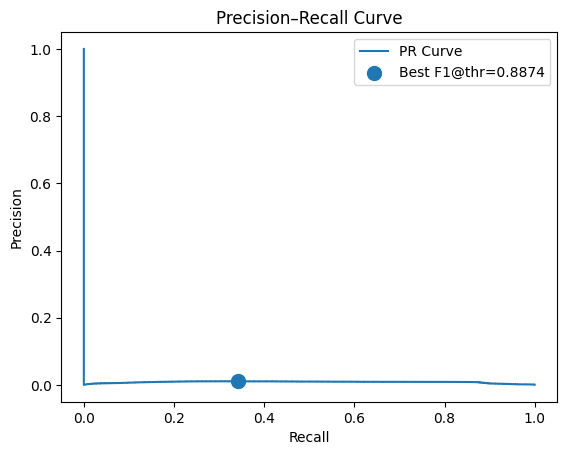

In [43]:
print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))
print(f"ROC-AUC: {roc_auc_score(y_test, y_proba):.4f}")
print(f"PR-AUC:  {average_precision_score(y_test, y_proba):.4f}")

precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba)
f1_scores = 2 * precisions * recalls / (precisions + recalls + 1e-8)
best_idx = np.argmax(f1_scores[:-1])
best_thr = thresholds[best_idx]
print(f"Best F1 threshold: {best_thr:.4f}")

plt.figure()
plt.plot(recalls, precisions, label="PR Curve")
plt.scatter(recalls[best_idx], precisions[best_idx],
            label=f"Best F1@thr={best_thr:.4f}", s=100)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve")
plt.legend()
plt.show()

In [ ]:
# !pip install scikeras

In [ ]:
# !pip install --upgrade scikit-learn scikeras

In [44]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from scikeras.wrappers import KerasClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import tensorflow as tf
from sklearn.neighbors import KNeighborsClassifier
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.3, random_state=42
)

for cls in (XGBClassifier, LGBMClassifier, RandomForestClassifier, SMOTEENN):
    if not hasattr(cls, "__sklearn_tags__"):
        cls.__sklearn_tags__ = lambda self: {}

input_dim = X_train.shape[1]

def create_mlp(input_dim=input_dim):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(input_dim,)),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['AUC'])
    return model

def create_deep(input_dim=input_dim):
    model = Sequential([
        Dense(256, activation='relu', input_shape=(input_dim,)),
        Dropout(0.4),
        Dense(128, activation='relu'),
        Dropout(0.4),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(1e-3),
                  loss='binary_crossentropy',
                  metrics=['AUC'])
    return model

pipeline_rf = Pipeline([
    ('smote', SMOTE(sampling_strategy=0.1, random_state=42)),
    ('undersamp', RandomUnderSampler(
        sampling_strategy=1.0,
        random_state=42)),
    ('rf', RandomForestClassifier(n_estimators=200, max_depth=20, n_jobs=-1, random_state=42))
])

pipeline_knn = Pipeline([
    ('smote', SMOTE(sampling_strategy=0.1, random_state=42)),
    ('undersamp', RandomUnderSampler(
        sampling_strategy=1.0,
        random_state=42)),
     ('knn',KNeighborsClassifier(n_neighbors=50))
])

pipeline_xgb = Pipeline([
    ('smote', SMOTE(sampling_strategy=0.1, random_state=42)),
    ('undersamp', RandomUnderSampler(
        sampling_strategy=1.0,
        random_state=42)),
    ('xgb', XGBClassifier(
        n_estimators=200, max_depth=6, learning_rate=0.1, eval_metric='auc',
        n_jobs=-1, random_state=42
    ))
])

pipeline_lgb = Pipeline([
    ('smote', SMOTE(sampling_strategy=0.1, random_state=42)),
    ('undersamp', RandomUnderSampler(
        sampling_strategy=1.0,
        random_state=42)),
    ('lgb', LGBMClassifier(
        n_estimators=200, max_depth=-1, learning_rate=0.1,
        n_jobs=-1, random_state=42
    ))
])

pipeline_mlp = Pipeline([
    ('smote', SMOTE(sampling_strategy=0.1, random_state=42)),
    ('scaler', StandardScaler()),
    ('undersamp', RandomUnderSampler(
        sampling_strategy=1.0,
        random_state=42)),
    ('mlp', KerasClassifier(build_fn=create_mlp, epochs=10, batch_size=1024, verbose=1))
])

pipeline_deep = Pipeline([
    ('smote', SMOTE(sampling_strategy=0.1, random_state=42)),
    ('scaler', StandardScaler()),
    ('undersamp', RandomUnderSampler(
        sampling_strategy=1.0,
        random_state=42)),
    ('deep', KerasClassifier(build_fn=create_deep, epochs=20, batch_size=1024, verbose=1))
])

In [45]:
results = []
for name, pipe in [
    ('RandomForest', pipeline_rf),
    ('KNN', pipeline_knn),
    ('XGBoost', pipeline_xgb),
    ('LightGBM', pipeline_lgb),
    ('MLP', pipeline_mlp),
    ('DeepNN', pipeline_deep),
]:
    print(f"\nTraining {name}...")
    pipe.fit(X_train, y_train)
    y_proba = pipe.predict_proba(X_test)[:, 1]
    print(f"{name} ROC-AUC:", roc_auc_score(y_test, y_proba))

    results.append({
        'Model': name,
        'ROC_AUC': roc_auc_score(y_test, y_proba),
        'PR_AUC': average_precision_score(y_test, y_proba),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred)
    })

df_results = pd.DataFrame(results).sort_values('ROC_AUC', ascending=False)


Training RandomForest...
RandomForest ROC-AUC: 0.9637920517043265

Training KNN...
KNN ROC-AUC: 0.7819692238717437

Training XGBoost...
XGBoost ROC-AUC: 0.9676027521090657

Training LightGBM...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 355121, number of negative: 355121
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.089552 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2077
[LightGBM] [Info] Number of data points in the train set: 710242, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
LightGBM ROC-AUC: 0.9694577710336411

Training MLP...


/usr/local/lib/python3.11/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
694/694 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - AUC: 0.9260 - loss: 0.3328
Epoch 2/10
694/694 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - AUC: 0.9642 - loss: 0.2301
Epoch 3/10
694/694 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - AUC: 0.9693 - loss: 0.2129
Epoch 4/10
694/694 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - AUC: 0.9719 - loss: 0.2027
Epoch 5/10
694/694 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - AUC: 0.9734 - loss: 0.1975
Epoch 6/10
694/694 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - AUC: 0.9741 - loss: 0.1947
Epoch 7/10
694/694 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - AUC: 0.9754 - loss: 0.1894
Epoch 8/10
694/694 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - AUC: 0.9765 - loss: 0.1854
Epoch 9/10
694/694 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - AUC: 0.9767 - loss: 0.1843
Epoch 10/10
694/694 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - AUC: 0.9773 - loss: 0.1818
1488/1488 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
MLP ROC-AUC: 0.96602612581054

Training DeepNN...


/usr/local/lib/python3.11/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
694/694 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - AUC: 0.9410 - loss: 0.2981
Epoch 2/20
694/694 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - AUC: 0.9696 - loss: 0.2115
Epoch 3/20
694/694 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - AUC: 0.9742 - loss: 0.1946
Epoch 4/20
694/694 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - AUC: 0.9763 - loss: 0.1866
Epoch 5/20
694/694 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - AUC: 0.9779 - loss: 0.1801
Epoch 6/20
694/694 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - AUC: 0.9789 - loss: 0.1754
Epoch 7/20
694/694 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - AUC: 0.9798 - loss: 0.1724
Epoch 8/20
694/694 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - AUC: 0.9806 - loss: 0.1689
Epoch 9/20
694/694 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - AUC: 0.9810 - loss: 0.1669
Epoch 10/20
694/694 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - AUC: 0.9812 - loss: 0.1656
Epoch 11/20
694/694 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - AUC: 0.9818 - loss: 0.1630
Epoch 12/20
694/694 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - AUC: 0.9821 - loss: 0.1616
Epoc

In [46]:
df_results

,Model,ROC_AUC,PR_AUC,Precision,Recall,F1 Score
3,LightGBM,0.969458,0.258588,0.006609,0.884739,0.01312
5,DeepNN,0.968470,0.259209,0.006609,0.884739,0.01312
2,XGBoost,0.967603,0.245396,0.006609,0.884739,0.01312
4,MLP,0.966026,0.220837,0.006609,0.884739,0.01312
0,RandomForest,0.963792,0.161873,0.006609,0.884739,0.01312
1,KNN,0.781969,0.015759,0.006609,0.884739,0.01312
